# Attrition Rate Analysis 
* will the existing employees leave the company or not. 
* New employee will join the company.
* if this happens continously then This leads to reduce the production and delay in delivery of projects , so avoid this sutivation the company want to control the Attrition.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
#reading the csv data file 
df =  pd.read_csv("Attrition Rate Analysis (1).csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [4]:
#Removing the unnecessary variables by droping 
df1 = df.drop(['EmployeeCount','EmployeeID','Over18'],axis=1)

In [5]:
#Checkig for null values and removing them if any 
df1=df1.dropna()

In [6]:
df1.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [7]:
#removing Duplicates  if any
df1 = df1.drop_duplicates()

# Univariate Analysis 
* Preprocessing - Label Encoding
* Summarization of data 
* crosstabs
* Histogram

In [8]:
from sklearn import preprocessing

In [9]:
le = preprocessing.LabelEncoder()

In [10]:
df1["Gender"] = le.fit_transform(df1['Gender'])
df1["Attrition"] = le.fit_transform(df1["Attrition"])
df1["MaritalStatus"] = le.fit_transform(df1["MaritalStatus"])


In [11]:
#CrossTabs
pd.crosstab(df1.Attrition,df1.Gender)

Gender,0,1
Attrition,,
0,498,735
1,90,147


In [12]:
#Descriptive statistics
#Summarization of data 
df1.describe()

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,0.600000,2.063946,1.097279,65029.312925,2.693197,15.209524,8.0,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129
std,9.135373,0.367863,8.106864,1.024165,0.490065,1.106940,0.730121,47079.567831,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136
min,18.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1.000000,2.000000,1.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1.000000,3.000000,2.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,1.000000,5.000000,2.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [13]:
df1['Age'].median()

36.0

In [14]:
df1['Age'].mode()

0    35
dtype: int64

In [15]:
pd.crosstab(df1.Attrition,df1.MaritalStatus)

MaritalStatus,0,1,2
Attrition,,,
0,294,589,350
1,33,84,120


In [16]:
#In above case 0,1,2 are Divorced,Married,Single 
print(le.classes_)

['Divorced' 'Married' 'Single']


In [17]:
import matplotlib.pyplot as plt

(array([ 57., 105., 224., 265., 255., 217., 131.,  92.,  77.,  47.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

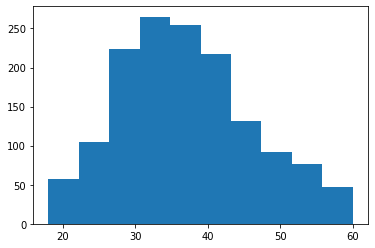

In [18]:
plt.hist(df1.Age)

* Here we are getting bell shaped curve which imples the variable Age is Normally distributed 
* As you can see, the distribution of Age follows the normal distributions. which means Most Age are close to the average (36.92 years). The standard deviation is 9.13, which indicates the typical distance that individual Age tend to fall from mean Age.

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9d823cc18>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9d823cf60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9d823c828>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9d825e9e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9d825ed30>],
 'means': []}

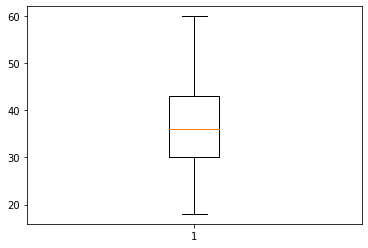

In [19]:
#Boxplot for checking the outliers 
plt.boxplot(df1.Age)

* The Variable Age has no outliers and follows Normall distribution since the median line is at center.

(array([365., 349., 290., 109., 110.,  56.,  52.,  18.,  54.,  67.]),
 array([ 10090.,  29080.,  48070.,  67060.,  86050., 105040., 124030.,
        143020., 162010., 181000., 199990.]),
 <a list of 10 Patch objects>)

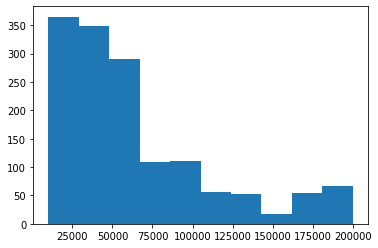

In [20]:
#Similarly histogram and boxplot for other variable i.e Monthly income 
plt.hist(df1.MonthlyIncome)

* Since the peakness is on the left hand side we can say that it is positively skewed i.e mean is more than median 

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9d833fcf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9d834c438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9d833f908>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9d834cac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9d834ce10>],
 'means': []}

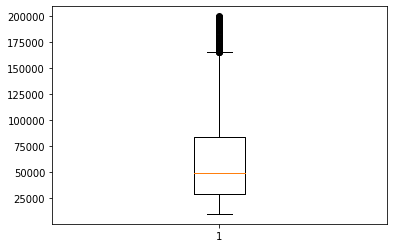

In [21]:
#boxplot of Monthly income 
plt.boxplot(df1.MonthlyIncome)

* the median line is below so it is positively skewed and there are few out liers in the data 

### Performing Parametric test on Attrition variable wrt Age(Since age is Normally Distributed we go for t-test ) 
* i.e to check is there any significance difference in the Age with  Attrition = yes and Attrition = No
* H0-Null Hypothesis : There is no signifiance difference between Age and Attrition Yes/No .
* H1-Alternative Hypothesis :There is signifiance difference between Age and Attrition Yes/No. 

In [22]:
Attrition_yes=df1[df1['Attrition']==1]
Attrition_No=df1[df1['Attrition']==0]

In [23]:
from scipy.stats import ttest_ind

In [24]:
stats,p = ttest_ind(Attrition_yes.Age,Attrition_No.Age)


In [25]:
stats,p

(-6.1786638353072165, 8.356308021103649e-10)

* Here P value (8.35e-10) is less than alpha = 0.05 ,which indicates we reject the Null Hypothesis and accept the Alternative Hypothesis i.e, there is significance difference in Age with respect to Attrition Yes and Attrition No . 

### Performing Non Parametric test on Attrition variable wrt Monthly Income 
### (Since Income  is  not Normally Distributed i.e positively skewed and the variables are independent  we go for MannWhitney test ) 
* i.e to check is there any significance difference in the Monthly Income with  Attrition = yes and Attrition = No
* H0-Null Hypothesis : There is no signifiance difference between Monthly Income and Attrition Yes/No .
* H1-Alternative Hypothesis :There is signifiance difference between Monthly Income and Attrition Yes/No. 

In [26]:
from scipy.stats import mannwhitneyu

In [27]:
stats,p = mannwhitneyu(Attrition_yes.MonthlyIncome,Attrition_No.MonthlyIncome)

In [28]:
stats,p

(140544.5, 0.17621332994327893)

* Here P value (0.17) is Greater than alpha = 0.05 ,which indicates we Accept the Null Hypothesis and conclude that, there is no significance difference in Age with respect to Attrition Yes and Attrition No . 

### Chi square test for dependency 
* H0-Null Hypothesis : There is no signifiance dependency between marital status and Attrition  .
* H1-Alternative Hypothesis : There is signifiance dependency between marital status and Attrition 

In [29]:
from scipy.stats import chi2_contingency

In [30]:
chitable=pd.crosstab(df1.Attrition,df1.MaritalStatus)

In [31]:
stats,p,dof,expected=chi2_contingency(chitable)

In [32]:
stats,p

(46.163676540848705, 9.45551106034083e-11)

* p value (9.45e-11) is less than alpha=0.05 , we reject Null hypothesis and conclude that there is signifinace dependency with Marital status and Attrition

# Correlation 
* Relationship between variables 
* Positive correlation , Negative correlation

In [33]:
df1.corr()

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.006963,-0.035706,-0.039352,-0.002884,-0.095029,-0.044314,0.299635,-0.033137,NaN,-0.031753,0.680381,-0.027308,0.311309,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.009730,-0.015111,0.018125,-0.010290,0.162070,-0.031176,0.043494,0.032533,NaN,-0.006839,-0.171063,-0.049431,-0.134392,-0.033019,-0.156199
DistanceFromHome,0.006963,-0.009730,1.000000,-0.008638,-0.044173,-0.037329,-0.027893,-0.021607,-0.013822,0.038125,NaN,0.011169,0.010111,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.015111,-0.008638,1.000000,-0.016547,0.045746,0.024991,0.006410,-0.016569,-0.040531,NaN,0.001261,-0.010440,0.010472,0.006080,0.022490,0.005358
Gender,-0.039352,0.018125,-0.044173,-0.016547,1.000000,-0.026854,-0.009132,0.007530,-0.066395,0.011841,NaN,0.019237,-0.026707,-0.030167,-0.017277,-0.021812,0.004438
JobLevel,-0.002884,-0.010290,-0.037329,0.045746,-0.026854,1.000000,-0.022021,0.047316,-0.008656,0.010973,NaN,0.000993,-0.037012,-0.032500,-0.064219,-0.060811,-0.055251
MaritalStatus,-0.095029,0.162070,-0.027893,0.024991,-0.009132,-0.022021,1.000000,-0.052383,-0.035505,0.006378,NaN,0.014745,-0.077886,0.012798,-0.059986,-0.030915,-0.038570
MonthlyIncome,-0.044314,-0.031176,-0.021607,0.006410,0.007530,0.047316,-0.052383,1.000000,-0.020315,0.004325,NaN,0.026930,-0.033402,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299635,0.043494,-0.013822,-0.016569,-0.066395,-0.008656,-0.035505,-0.020315,1.000000,0.031235,NaN,0.017922,0.237639,-0.032235,-0.118421,-0.036814,-0.110319
PercentSalaryHike,-0.033137,0.032533,0.038125,-0.040531,0.011841,0.010973,0.006378,0.004325,0.031235,1.000000,NaN,0.012548,-0.019150,-0.037392,-0.029707,-0.029542,-0.040864


# Fitting a siple Predictor Model 

In [40]:
from sklearn.linear_model import LogisticRegression

In [44]:
y = df1[['Attrition']]
x = df1[['DistanceFromHome','MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsWithCurrManager']]

In [52]:
x.shape

(1470, 5)

In [45]:
Lr = LogisticRegression()

In [53]:
Multiple_logistic = Lr.fit(x,y)

D:\pratz\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\pratz\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Make predictions on entire test data

In [60]:
#predicting the model 
predict = Multiple_logistic.predict(x)
predict


array([0, 0, 0, ..., 0, 0, 0])

### Model Performance

In [63]:
score = Multiple_logistic.score(x, y)
print(score)

0.8387755102040816


* 83 % of data is correctly classified 

### Confusion Matrix 

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix(y,predict)

array([[1233,    0],
       [ 237,    0]], dtype=int64)

### Coefficients of model 

In [66]:
Multiple_logistic.intercept_

array([-0.00664425])

In [67]:
Multiple_logistic.coef_

array([[-1.45417502e-02, -5.65127878e-06, -7.48164392e-02,
        -3.80932602e-02, -3.44307186e-02]])